In [1]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# loading dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [3]:
# checking no of rows and columns in the dataset 
df.shape

(73100, 15)

In [4]:
# Columns in the dataset
df.columns 

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [5]:
# checking any duplicate values in data, no duplicate values
df.duplicated().sum().sum()

0

In [6]:
# finding null values in data , there is no null value in the dataset 
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [7]:
# dataset summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [8]:
# statistical summary of dataset 
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [9]:
# correlation between numeric columns
df.corr(numeric_only=True)

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
Inventory Level,1.000000,0.589995,0.001060,0.588561,0.009140,0.004889,0.003411,0.009365
Units Sold,0.589995,1.000000,-0.000930,0.996853,0.001082,0.002576,-0.000374,0.001259
Units Ordered,0.001060,-0.000930,1.000000,-0.001102,0.004212,-0.000938,0.005446,0.004596
Demand Forecast,0.588561,0.996853,-0.001102,1.000000,0.000675,0.002338,-0.000526,0.000844
Price,0.009140,0.001082,0.004212,0.000675,1.000000,0.001509,0.002309,0.993900
Discount,0.004889,0.002576,-0.000938,0.002338,0.001509,1.000000,-0.000852,0.001958
Holiday/Promotion,0.003411,-0.000374,0.005446,-0.000526,0.002309,-0.000852,1.000000,0.001890
Competitor Pricing,0.009365,0.001259,0.004596,0.000844,0.993900,0.001958,0.001890,1.000000


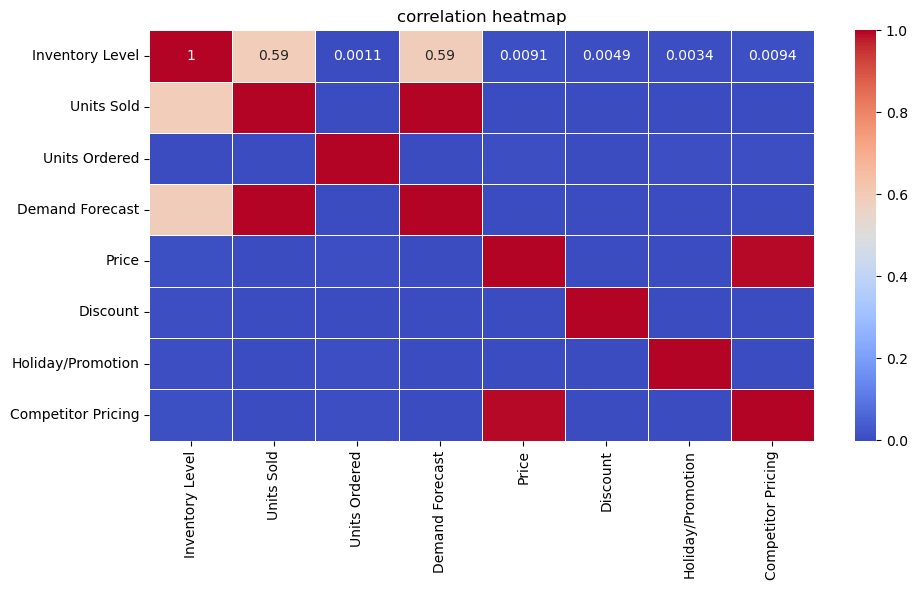

In [10]:
# Plotting correlation heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation heatmap')
plt.tight_layout()
plt.show()

In [11]:
df = df.drop('Date', axis=1)

In [12]:
# libraries
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [13]:
# list of categorical columns
categorical_cols = ['Store ID', 'Product ID', 'Category', 'Region','Weather Condition', 'Holiday/Promotion', 'Seasonality']

In [14]:
#one hot encoding 
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
# splitting features and targets 
X = df_encoded.drop('Units Sold', axis=1)
y = df_encoded['Units Sold']

In [16]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# training random forest model 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# predicting on test data 
y_pred = model.predict(X_test)

In [24]:
# Evaluating metrics and displaying results
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 7.26
MSE: 73.27
RMSE: 8.56
R² Score: 0.99


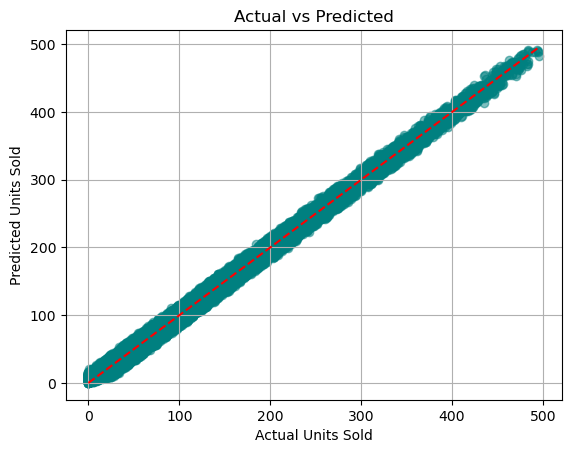

In [28]:
# plotting the actual vs predicted values 
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


In [20]:
joblib.dump(model, 'sales_models.joblib')

['sales_models.joblib']

In [21]:
# Create a Gradio app to predict sales
import gradio as gr
import joblib

model = joblib.load('sales_models.joblib')

def predict_sales(Store_ID, Product_ID, Category, Region,
                  Inventory_Level, Price, Discount, Demand_Forecast):
    input_dict = {
        "Store ID": [Store_ID],
        "Product ID": [Product_ID],
        "Category": [Category],
        "Region": [Region],
        "Inventory Level": [float(Inventory_Level)],
        "Price": [float(Price)],
        "Discount": [float(Discount)],
        "Demand Forecast": [float(Demand_Forecast)]
    }
    
    input_df = pd.DataFrame(input_dict)
    
    #One hot encoding
    input_df_encoded = pd.get_dummies(input_df)
    
    model_features = model.feature_names_in_  
    for col in model_features:
        if col not in input_df_encoded.columns:
            input_df_encoded[col] = 0
    input_df_encoded = input_df_encoded[model_features]

    #Predicting
    prediction = model.predict(input_df_encoded)
    return f"Predicted Units Sold: {int(prediction[0])}"

interface = gr.Interface(
    fn=predict_sales,
    inputs=[
        gr.Textbox(label='Store_ID'),
        gr.Textbox(label='Product_ID'),
        gr.Textbox(label='Category'),
        gr.Textbox(label='Region'),
        gr.Textbox(label='Inventory_Level'),
        gr.Textbox(label='Price'),
        gr.Textbox(label='Discount'),
        gr.Textbox(label='Demand_Forecast'),
    ],
    outputs='text',
    title='Sales Prediction Tool',
    description="Enter key product and store details to predict units sold."
)

interface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
